In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

os.system('jupyter nbconvert --to python Pytorch_utils.ipynb')
from Pytorch_utils import FROC_per_FOLD, check_image_FROC
from tqdm import tqdm

[NbConvertApp] Converting notebook Pytorch_utils.ipynb to python
[NbConvertApp] Writing 98282 bytes to Pytorch_utils.py
/home/nguyen-k/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dim = (32*4, 32*3, 32*6)
spacing = 4

100%|██████████| 10/10 [13:02<00:00, 78.22s/it]


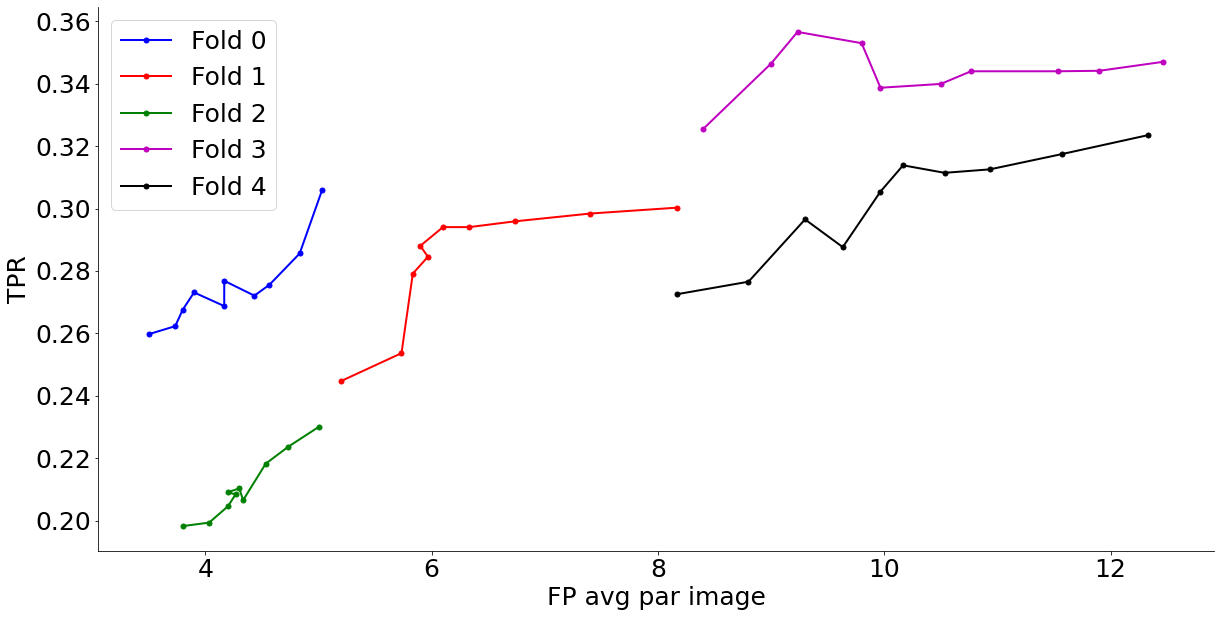

In [4]:
# plot FROC curves over 5 folds
color = ['b', 'r', 'g','m','k']
marker = ['o','X','D']
linestyle = ['-', '--', '-.']
legend = []

fig, ax = plt.subplots(figsize=(20, 10))
for ind_list in range(1):                                 
    for fold in range(5):
        param = {'path_seg' : f'/home/nguyen-k/Bureau/segCassiopet2/Comparatif/Archives_4diffuse/Multitask_PET_L{ind_list}/Fold{fold+1}/Fig_seg_test/',
                'nb_threshold': 10,
                'threshold_dist' : 5}
        sensitivity_avg, false_positive_avg, list_image_seg, list_image_label, list_nb_lesion_pred, list_nb_lesion, FP, TP = FROC_per_FOLD(**param)
        ax.plot(false_positive_avg, sensitivity_avg,color=color[fold], marker=marker[ind_list], linestyle=linestyle[ind_list], 
                            linewidth=2, markersize=5,label=f'Fold {fold}')
        ax.set_xlabel('FP avg par image',fontsize=25)
        ax.set_ylabel('TPR',fontsize=25)
        plt.xticks(fontsize=25)
        plt.yticks(fontsize=25)
        ax.spines['right'].set_visible(False) 
        ax.spines['top'].set_visible(False) 
        ax.legend(prop={'size': 25})
#ax.legend()



In [3]:
# visualisation check for TPR, FP per images
def check_images(sensitivity_avg, false_positive_avg, list_image_seg, list_image_label, list_nb_lesion_pred, list_nb_lesion, FP, TP):

    for i in range(len(TP)):
        image_seg = list_image_seg[i]
        image_label = list_image_label[i]
        intersection = image_seg*image_label
        nb_lesion_pred = list_nb_lesion_pred[i]
        nb_lesion = list_nb_lesion[i]


        axis = 1
        mip_label=np.amax(image_label,axis=axis)
        mip_seg = np.amax(image_seg,axis=axis)
        mip_intersection = np.amax(intersection,axis=axis)


        plt.figure(figsize=(20,10))
        plt.subplot(2,3,1)
        plt.imshow(mip_label, cmap='Greys',alpha=0.8)
        plt.title(f'Label, P={nb_lesion}')

        plt.subplot(2,3,2)
        plt.imshow(mip_seg, cmap='Greys',alpha=0.8)
        plt.title(f'Seg, Pred={nb_lesion_pred}')

        plt.subplot(2,3,3)
        plt.imshow(mip_intersection, cmap='Greys',alpha=0.8)
        plt.title(f'Seg, TP={TP[i]}, FP={FP[i]}')

        axis = 0
        mip_label=np.amax(image_label,axis=axis)
        mip_seg = np.amax(image_seg,axis=axis)
        mip_intersection = np.amax(intersection,axis=axis)

        plt.subplot(2,3,4)
        plt.imshow(mip_label, cmap='Greys',alpha=0.8)
        plt.title(f'Label, P={nb_lesion}')

        plt.subplot(2,3,5)
        plt.imshow(mip_seg, cmap='Greys',alpha=0.8)
        plt.title(f'Seg, Pred={nb_lesion_pred}')

        plt.subplot(2,3,6)
        plt.imshow(mip_intersection, cmap='Greys',alpha=0.8)
        plt.title(f'Seg, TP={TP[i]}, FP={FP[i]}')

        plt.savefig(f'/home/nguyen-k/Bureau/segCassiopet/Comparatif/FigTest/img{i}.jpeg')
        plt.close('all')